## Data Science for Mechanical Systems - Homework 1 - Na2736

## Project Description:
In this assignment, we are provided with a dataset containing Boston Housing features and median values. We have to provide and answer the following: 
1. (25 pts) Describe the data:

  1.What missing values are there?
  
  2.What are the summary statistics of the numerical features?
  
  3.What do the distributions of the features look like?
  

2. (25 pts) What features are most correlated with housing price?
3. (25 pts) Generate a new feature based on the existing dataset that you think would help explain housing prices and plot its relationship with housing price.
4. (25 pts) With scikit-learn, develop a model with the training data and make predictions on the test data. Plot your predictions.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [2]:
df=pd.read_csv('/Users/nadiam/2-DSforMechanics/Homework 1- Boston Housing/Boston_Housing_Data.csv') # We read in 
#our dataset// if this doesn't work, the csv is in the accompanied folder
df.head(10) # show a few coloumns to get a feel for what the data looks like

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,6,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,8,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,9,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,10,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


# Describing the data: 


In [3]:
# Before we analyze our data, lets make sure we understand what we have by describing the data.
df.describe()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,253.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,1.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,127.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,253.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,379.750000,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,506.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## What values are missing? 

 From this table, we can see our data points count for each column. All the columns in our data set have 506 datapoints, so there are no missing values. 

## What are the summary statistics of the numerical features?

From that same table, we can see the mean, standard deviation, minimum and maximum values, and percentile values for all of our numberical features.

## What do the distributions of the features look like? 

In [4]:
dfm = df.melt(var_name='columns') #merges df together to get it into form for a facet grid
g = sns.FacetGrid(dfm, col='columns')
g = (g.map(sns.distplot,'value'))

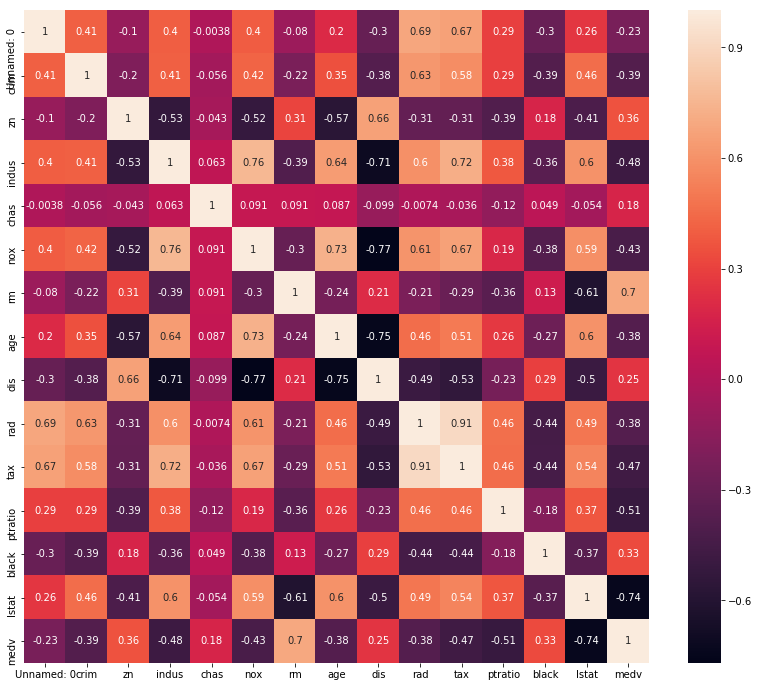

In [5]:
%matplotlib inline
corr=df.corr()# finding correlation between all the different variables
fig, ax =plt.subplots(figsize=(14,12)) # sets the size for figure
sns.heatmap(ax=ax, data=corr,annot=True)

### A clearer way of looking at the correlations 

In [6]:
numeric_features = df.select_dtypes(include=[np.number])
corr = numeric_features.corr() 
print (corr['medv'].sort_values(ascending=False)[:5], '\n') # Prints the top 5 positive correlations
print (corr['medv'].sort_values(ascending=False)[-5:]) # Prints the top 5 negative correlations

medv     1.000000
rm       0.695360
zn       0.360445
black    0.333461
dis      0.249929
Name: medv, dtype: float64 

nox       -0.427321
tax       -0.468536
indus     -0.483725
ptratio   -0.507787
lstat     -0.737663
Name: medv, dtype: float64


## Looking for numerical features

I spent some time looking at how different features reacted with one another based on the correlations I previously found. For example:

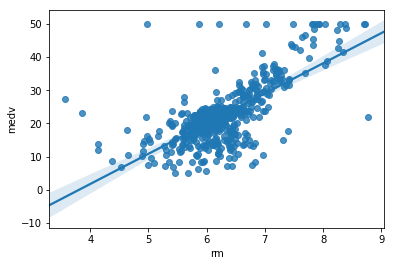

In [7]:
room_reg=sns.regplot(x='rm', y='medv', data=df) # Generates regression pattern for rm against the median value



From this graph, we can see that the median value of a home increases generally with an increase of the room numbers. While there are general outliers, there is still some visible trend. 

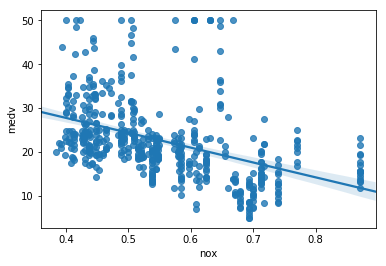

In [8]:
nox_reg=sns.regplot(x='nox', y='medv', data=df)


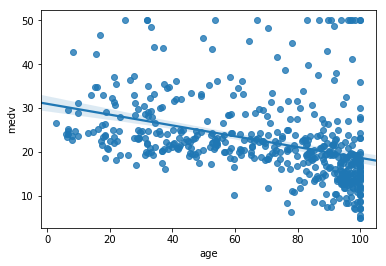

In [9]:
age_reg=sns.regplot(x='age', y='medv', data=df)


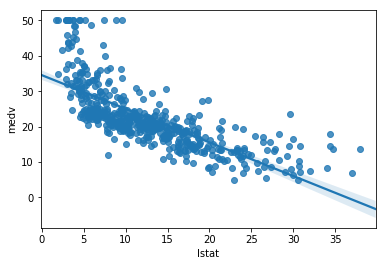

In [10]:
stat_reg=sns.regplot(x='lstat', y='medv', data=df)


Whereas here, we can see that nitric oxides concentration generally reduce median home values.

Room numbers, home ages, and lstat seemed like interesting features to explore.

In [11]:
df['rm']=df['rm'].round() #rounded room values to nearest whole number because I dont believe in partial rooms but 
#to easily fix the room distribution to clarify the data 
df.rm.unique()

array([ 7.,  6.,  5.,  8.,  9.,  4.])

In [12]:
room_table = df.pivot_table(index='rm',
                  values='medv', aggfunc=np.median)
room_table

,medv
rm,
4.0,13.80
5.0,14.40
6.0,19.90
7.0,28.70
8.0,46.35
9.0,50.00


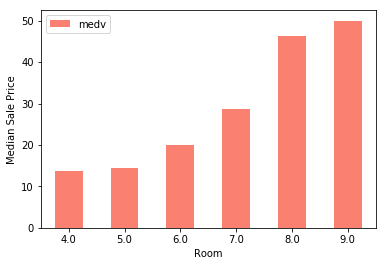

In [13]:
room_table.plot(kind='bar', color='salmon') # we plot the results of the roo median value table after we corrected 
plt.xlabel('Room')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

I adapted this encoding function that it would set a certain parameter depending on the feature. 

In [14]:
def encode(x):
 return 1 if x < 10 else 0 # where x<10 means that the lstat value is under 10.
df['lstat-feature'] = df.lstat.apply(encode) # we isolate the lstat 

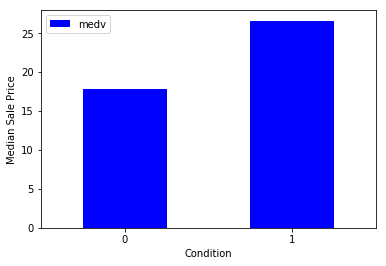

In [15]:
lstat_pivot = df.pivot_table(index='lstat-feature', values='medv', aggfunc=np.median)
lstat_pivot.plot(kind='bar', color='blue')
plt.xlabel('Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

In [16]:
def encode(x):
 return 1 if x > 80 else 0 # where under 80, there's a higher median value.
df['ageism'] = df.age.apply(encode) #we'll call this ageism because we're descriminating houses for their ages

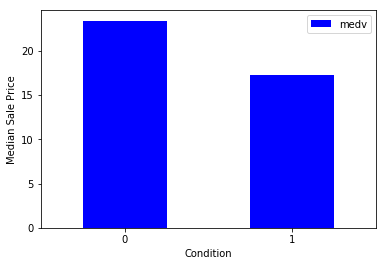

In [17]:
age_pivot = df.pivot_table(index='ageism', values='medv', aggfunc=np.median)
age_pivot.plot(kind='bar', color='blue')
plt.xlabel('Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

In [18]:
def encode(x):
 return 1 if x > 6 else 0 # where over 6, most houses are higher than the mean.
df['family'] = df.rm.apply(encode) #we'll call this family because families might need a bigger ome 

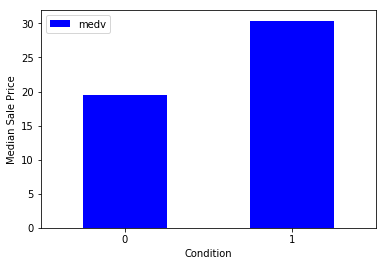

In [19]:
family_pivot = df.pivot_table(index='family', values='medv', aggfunc=np.median)
family_pivot.plot(kind='bar', color='blue')
plt.xlabel('Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

In [20]:
def encode(x):
 return 1 if x > 0.6 else 0 # under 0.6, more expensive homes clock in
df['health'] = df.nox.apply(encode)

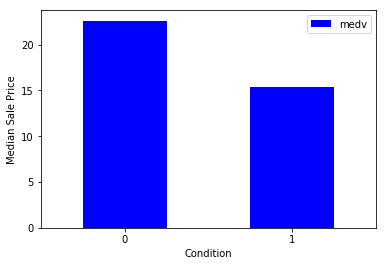

In [21]:
health_pivot = df.pivot_table(index='health', values='medv', aggfunc=np.median)
health_pivot.plot(kind='bar', color='blue')
plt.xlabel('Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

## Building linear models with SciKit

In [22]:
#split the data 
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split

y = np.log(df.medv)
X = df.drop(['medv'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.33) # we split the data 
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(X_train.head(10))

(339, 18) (339,)
(167, 18) (167,)
     Unnamed: 0      crim    zn  indus  chas    nox   rm   age     dis  rad  \
478         479  10.23300   0.0  18.10     0  0.614  6.0  96.7  2.1705   24   
26           27   0.67191   0.0   8.14     0  0.538  6.0  90.3  4.6820    4   
7             8   0.14455  12.5   7.87     0  0.524  6.0  96.1  5.9505    5   
492         493   0.11132   0.0  27.74     0  0.609  6.0  83.5  2.1099    4   
108         109   0.12802   0.0   8.56     0  0.520  6.0  97.1  2.4329    5   
37           38   0.08014   0.0   5.96     0  0.499  6.0  41.5  3.9342    5   
157         158   1.22358   0.0  19.58     0  0.605  7.0  97.4  1.8773    5   
472         473   3.56868   0.0  18.10     0  0.580  6.0  75.0  2.8965   24   
118         119   0.13058   0.0  10.01     0  0.547  6.0  73.1  2.4775    6   
114         115   0.14231   0.0  10.01     0  0.547  6.0  84.2  2.2565    6   

     tax  ptratio   black  lstat  lstat-feature  ageism  family  health  
478  666     20.2  379

In [23]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)


In [24]:
print('Score:', model.score(X_test, y_test))


Score: 0.771434343248


In [25]:
predictions = model.predict(X_test)


In [26]:
from sklearn.metrics import mean_squared_error
print ('RMSE is:', mean_squared_error(y_test, predictions))


RMSE is: 0.0366714205339


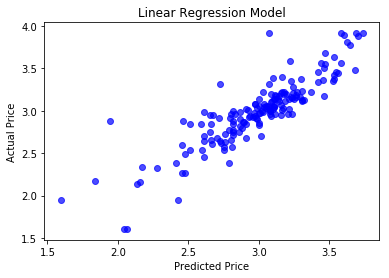

In [27]:
actual_values = y_test
plt.scatter(predictions, actual_values, alpha=.7,
            color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
plt.show()

Citations: 
* https://towardsdatascience.com/feature-engineering-in-python-part-i-the-most-powerful-way-of-dealing-with-data-8e2447e7c69e
* https://www.dataquest.io/blog/machine-learning-tutorial/
* https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6
